Loading, Accessing and Cleaning the data

In [4]:
#importing desrired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#reading files
#Data Description file explains column names of both the files
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

In [6]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [8]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

We can see that the Date columns are also an object type. Lets convert them to datetime type.

In [9]:
date = ['date_activ','date_end','date_modif_prod','date_renewal']
for i in date:
    client_data[i] = pd.to_datetime(client_data[i])

In [10]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
price_data['price_date'] = pd.to_datetime(price_data['price_date'])

In [12]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


The average tenure of a client is 5 years

The average net marging from each customer is $189.26 

Mean power subsribed the customers is 18.13 Units

In [13]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


This data includes the price range for the year 2015.

Mean price for power paid by the customers in 1st period , 2nd period, 3rd period of year 2015 is $43.44/unit, $10.62/unit, $6.4/unit

Mean price for gas paid by the customers in 1st period , 2nd period, 3rd period of year 2015 is $0.14/unit, $0.05/unit, $0.03/unit

In [14]:
client_data.shape

(14606, 26)

In [15]:
price_data.shape

(193002, 8)

Checking Null Values

In [16]:
print('null values in the client dataset',client_data.isnull().sum().sum())
print('null values in the price dataset',price_data.isnull().sum().sum())

null values in the client dataset 0
null values in the price dataset 0


Our data is clean and we dont have any null values. Analysing description of that dataset, we noticed that there are no negative values too. Thus our data is clean and we can process the data and analyse it now.

<h3>Visualization</h3>

Churned Customers

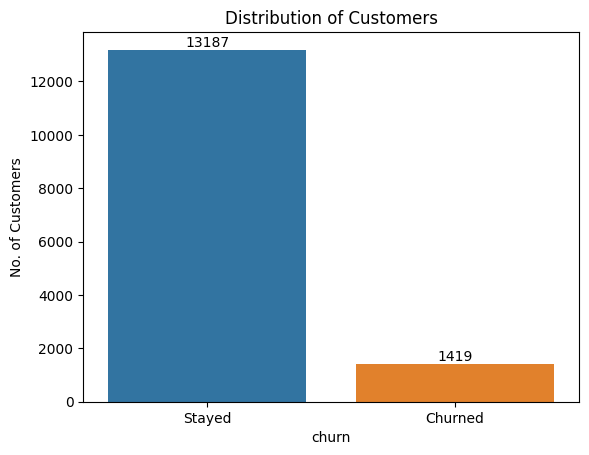

In [17]:
mapping = {0:'Stayed',1:'Churned'}
ssplot = sns.barplot(x=client_data['churn'].value_counts().index.map(mapping),y=client_data['churn'].value_counts())
plt.xlabel('churn')
plt.ylabel('No. of Customers')
plt.title('Distribution of Customers')
plt.bar_label(ssplot.containers[0])
plt.show()

From 14606 customers subscribed to PowerCo, 1419 customers were churned out and 13187 still continued their services.

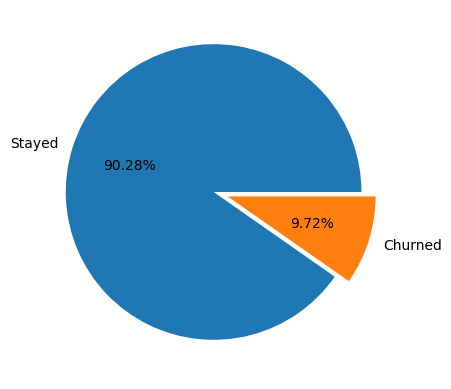

In [18]:
plt.pie(client_data['churn'].value_counts(),labels=client_data['churn'].value_counts().index.map(mapping),autopct='%.2f%%',explode =[0.05,0.05])
plt.show()

Percentage-wise distribution: 90.28% stayed and 9.72% customers left PowerCo.

<AxesSubplot:xlabel='churn', ylabel='num_years_antig'>

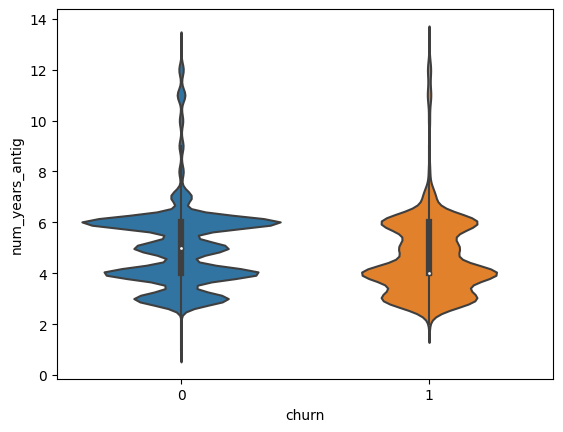

In [19]:
sns.violinplot(y = client_data['num_years_antig'],x =  client_data['churn'])

We noticed that the customers who left stayed with the company for 4 years. Customers who spend 4 years with the company were highly probable to leave the company.

Customers who were with the company for the last 6 years, have high frequency for staying with the company.

We chose Violin plot for the analysis as the boxplot graph doesnt give average years of the customers who were churned. Actually, correlating violin graph and boxplot, we understand that the average years of the customers who left and the 25% quartile coincide.

<AxesSubplot:xlabel='churn', ylabel='num_years_antig'>

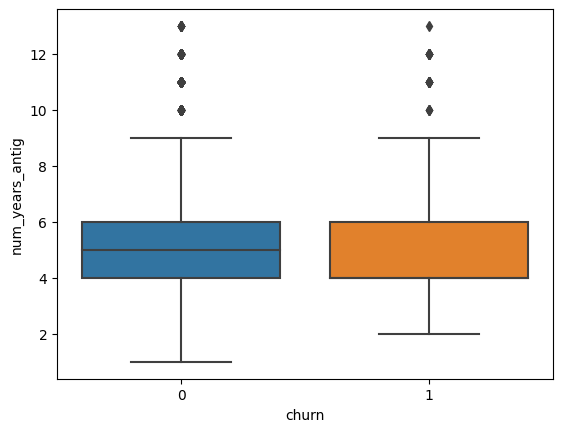

In [20]:
sns.boxplot(y= client_data['num_years_antig'],x = client_data['churn'])

Boxplot shows some outliers which are expected in a data that some customers after being connected the company for more than 8 years also, left the company

Analysis of factors like electricity and gas consumption during last 1 year, 6 months , last month and current consumption for Churned Customers

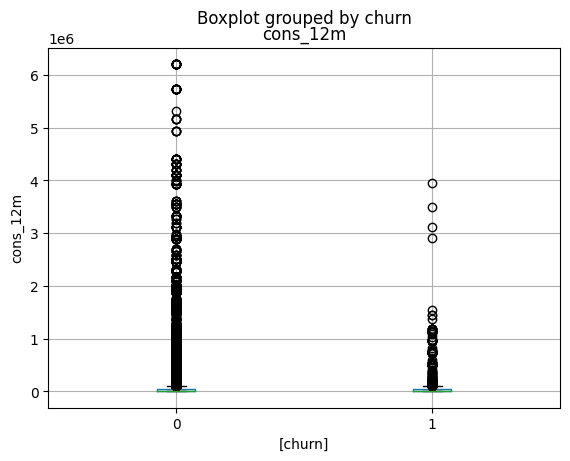

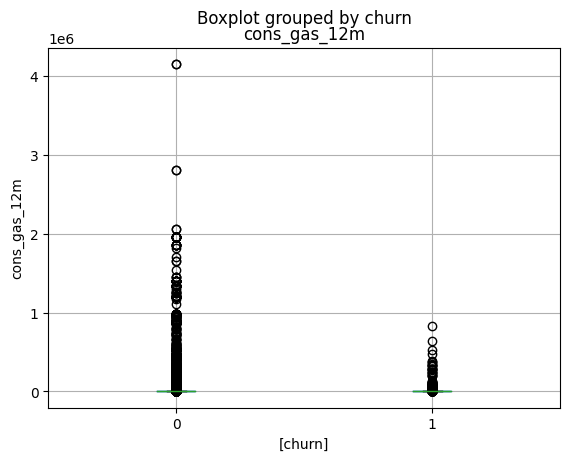

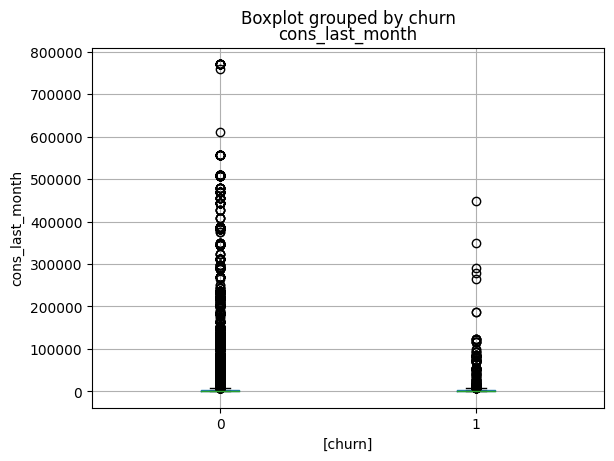

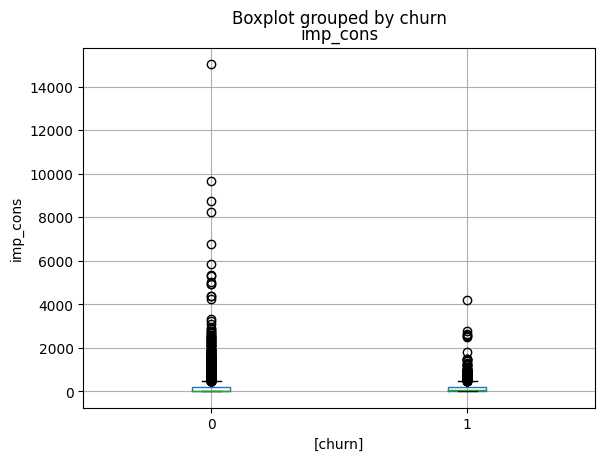

In [21]:
consume = client_data[['cons_12m','cons_gas_12m','cons_last_month','imp_cons']]
for i in consume:
    client_data.boxplot(column=i, by = ['churn'])
    plt.title(i)
    plt.ylabel(i)
plt.show()

Analysis of the consumption of gas and power for the last 12 months, last month and current month clearly shows that the consumption was very less for the churned customers.

Campaigns which gained customers to the company and the net revenue from these campaigns.

In [22]:
camp_map = {'lxidpiddsbxsbosboudacockeimpuepw':'camp1','ldkssxwpmemidmecebumciepifcamkci':'camp2','kamkkxfxxuwbdslkwifmmcsiusiuosws':'camp3','MISSING':'camp4','usapbepcfoloekilkwsdiboslwaxobdp':'camp5','ewxeelcelemmiwuafmddpobolfuxioce':'camp6'}
camp = client_data[['origin_up','net_margin','churn']]
camp['origin_up'] = camp['origin_up'].map(camp_map)
camp1 = camp[camp['churn']==1].value_counts(subset='origin_up')
camp2 = camp[camp['churn']==0].value_counts(subset='origin_up')

/tmp/ipykernel_1691222/4178983172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  camp['origin_up'] = camp['origin_up'].map(camp_map)


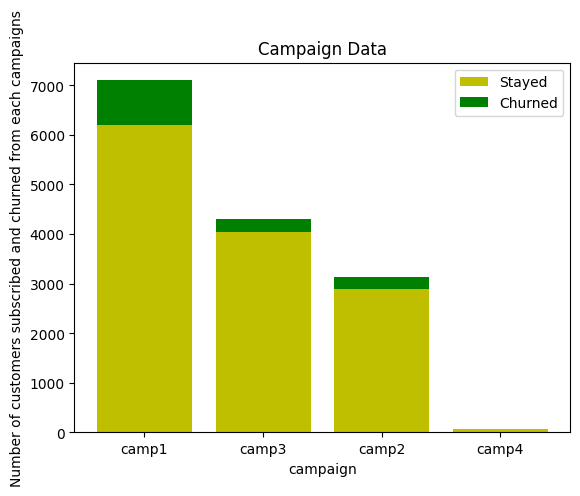

In [23]:
camp2 = camp2[0:4]
plt.bar(camp2.index, camp2, color = 'y')
plt.bar(camp2.index, camp1, bottom = camp2, color = 'g')
plt.xlabel('campaign')
plt.ylabel('Number of customers subscribed and churned from each campaigns')
plt.legend(['Stayed','Churned'])
plt.title('Campaign Data')
plt.show()

So, from the campaigns that were run , the campaign with the id 'camp1', 'camp2', 'camp3' attracted the most amount of customers to the company. 

The campaigns 'camp5', 'camp6' were a total fail.

Revenue made from each campaign

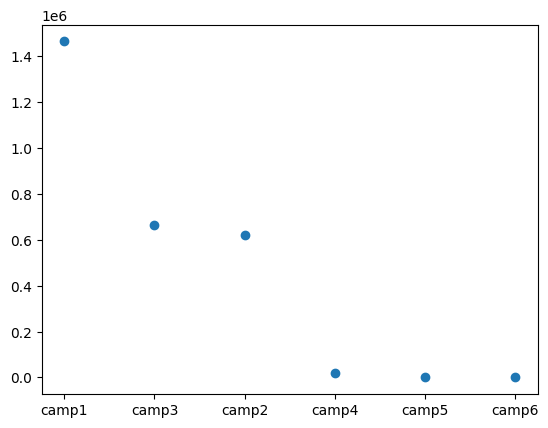

In [24]:
rev = camp[['origin_up','net_margin']]
rev = rev.groupby('origin_up')['net_margin'].sum().sort_values(ascending=False)
plt.scatter(rev.index,rev)

The campaign 'camp1' attracted most customers and made the highest revenue campaign for the company. 

As seen earlier, 'camp6' campgin didnt work out well for the company.

Customers who are giving a good positive margin to the company and if, are about to churn.

In [25]:
custchurn= client_data[['id','net_margin','churn','num_years_antig']]
custchurn = custchurn[custchurn['churn']==1]
custchurn = custchurn.drop(columns= 'churn')
custchurn.sort_values(by=['net_margin'],ascending = False).head(10)

,id,net_margin,num_years_antig
2596,fb7dcb0f4e0dc4ee54874eab2607c4da,24570.65,3
3861,e8948a5469344e9ad0dfcacbb705f709,3768.16,4
14274,6c2d7343c53156d1f6ec797be3bf22af,3403.27,4
1316,6f918b83d4a565c165a4ac842d724a2b,3323.02,4
10564,753a0c79149d82367a1539b70cae6c37,2450.54,6
8647,c08875e5ea7cc6064bda2ab315ac04e7,1919.63,5
14037,e0146123a8b3279abaa52b22c4735231,1899.80,4
9843,d8a90bff8ae32c141b8e73e30ac730df,1817.41,4
7578,60592e246dc36ab75bc52f9e2c01fdec,1730.45,3
392,d15ef55fdbf63ef2bddfd1bd67959ab4,1598.33,7


These customers who are giving the highest revenue to the company are at the risk of churning as most of the customers are connected with the company for 4 years, which as we seen from the violin plot are more likely to churn.

<h1>Price Sensitive Hypothesis</h1>

Checking price sensitivity towards churn to see if the price has elastic or inelastic nature against churning for the company. This will give us an insight that if the price is an indicator for the customer churning or not. If price is inelastic against churning, that means churning of customers is due to some other factor for which we need additional data to analyse. If price is elastic against churning, we will get to know the price at which the customers start churning.

Here, We have only 2015 price data. We will analyse the data based on the has_gas data. If the customers has subscribed to gas , we will analyse the price senitivity against churning for both gas and power prices. If the customers didnt subscribe to gas, we will analyse the price sensitivity against churning for power price only.

In [26]:
hg = client_data[['id','has_gas','churn']]
mapp = {'f':0,'t':1} #f means not subscribed, t means subscribed to gas
hg['has_gas'] = hg['has_gas'].map(mapp)
hg

/tmp/ipykernel_1691222/1720532653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hg['has_gas'] = hg['has_gas'].map(mapp)


,id,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,0
2,764c75f661154dac3a6c254cd082ea7d,0,0
3,bba03439a292a1e166f80264c16191cb,0,0
4,149d57cf92fc41cf94415803a877cb4b,0,0
...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,1,0
14602,d0a6f71671571ed83b2645d23af6de00,0,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,0,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0,0


In [27]:
hg.value_counts(subset='has_gas')

has_gas
0    11955
1     2651
dtype: int64

So, only a small portion of customers i.e 2651 customers from 14606 have subscribed to the gas.

In [28]:
price_data

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


<h4>Customers who didnt subscribe to gas.</h4>

The customers who didnt subscribe to the gas, we will analyse the prices only for the power for those customers. Referring to the Data Document, last three columns named 'price_off_peak_fix','price_peak_fix','price_mid_peak_fix' refers to the price of the power. So, we will consider working with these three columns.

In [29]:
hgfalse = hg[hg['has_gas']==0]
hgfalse

,id,has_gas,churn
1,d29c2c54acc38ff3c0614d0a653813dd,0,0
2,764c75f661154dac3a6c254cd082ea7d,0,0
3,bba03439a292a1e166f80264c16191cb,0,0
4,149d57cf92fc41cf94415803a877cb4b,0,0
5,1aa498825382410b098937d65c4ec26d,0,1
...,...,...,...
14600,c49217f16a06263e5381eaba94a67a8b,0,0
14602,d0a6f71671571ed83b2645d23af6de00,0,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,0,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0,0


In [30]:
price_power = price_data[['id','price_date','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']]
mean_price_power = price_power.groupby(['id']).mean().reset_index()
price_features = pd.merge(mean_price_power, hgfalse[['id','churn']], on='id')
price_features

/tmp/ipykernel_1691222/1026020050.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_price_power = price_power.groupby(['id']).mean().reset_index()


,id,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,0002203ffbb812588b632b9e628cc38d,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,44.385450,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,45.319710,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,44.266930,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,40.728885,24.437330,16.291555,0
...,...,...,...,...,...
11950,ffe255be491c6576c37e257608ab4c02,44.341005,0.000000,0.000000,0
11951,ffebf3f48e6728e2f688073b77ad8703,44.444710,0.000000,0.000000,0
11952,ffebf6a979dd0b17a41076df1057e733,40.606699,24.364017,16.242678,0
11953,fffac626da707b1b5ab11e8431a4d0a2,44.311375,0.000000,0.000000,0


/tmp/ipykernel_1691222/69202858.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_features.corr()


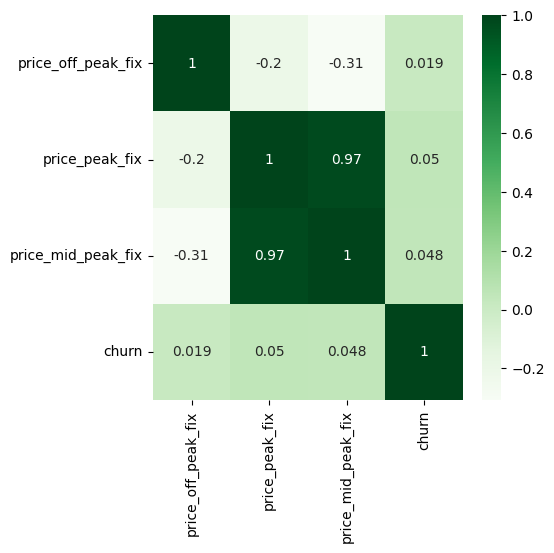

In [31]:
plt.figure(figsize=(5,5))
corr = price_features.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Heatmap clearly shows that Prices throughout the year for each customer who didnt subscribed for the Gas doesnt correlate with the Churning of customers. The correlation value is very less for all the features. This means that for these customers, price is not the factor on which they rely to stop their subscription. We need to get more data in this case like power outage frequency data to get in depth to know about customer's mindset for churning. 

<h4>Customers who subscribe to gas.</h4>

The customers who subscribe to the gas, we will analyse the prices of both gas and power. 

In [32]:
hgtrue = hg[hg['has_gas']==1]
hgtrue

,id,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1,1
12,2c05848e1a577dd041ea6804bbf5bbf5,1,0
16,bd14bbac3aca710ee5288fcd8511d4bb,1,0
20,db6ac41fb6972374f28bc6f8e43b9764,1,0
29,26c7bba7d51f86a16109de505bcd4f52,1,0
...,...,...,...
14579,bf66a3bdf8aa388aa8b5e61aa938f516,1,0
14586,6e5805466140ae1817101694e76a15a2,1,0
14589,b11e232e1759b31e71fac391c6d52594,1,0
14599,46362cb1ad2fcdad347a6fa1bc1e5d4b,1,0


Refer to the Data Document, we get to know that the columns specify prices for different periods. 

'price_off_peak_var' and 'price_off_peak_fix' represents powers of gas and power for the first period. So for the customer buying both utilites, we can add these two columns as a final price for that period. Similarly, we can do this for the next two periods.

In [33]:
price_data['first_period_price'] = price_data['price_off_peak_var'] + price_data['price_off_peak_fix']
price_data['second_period_price'] = price_data['price_peak_var'] + price_data['price_peak_fix']
price_data['third_period_price'] = price_data['price_mid_peak_var'] + price_data['price_mid_peak_fix']
price_data = price_data.groupby(['id']).mean().reset_index()
price_features_ = pd.merge(price_data, hgtrue[['id','churn']], on='id')
price_features_

/tmp/ipykernel_1691222/1202718665.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_data = price_data.groupby(['id']).mean().reset_index()


,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,first_period_price,second_period_price,third_period_price,churn
0,001987ed9dbdab4efa274a9c7233e1f4,0.122756,0.102290,0.073030,40.647427,24.388455,16.258972,40.770183,24.490746,16.332002,0
1,002d70a2bdf9cf62f10d1efbea890f69,0.148550,0.000000,0.000000,44.355820,0.000000,0.000000,44.504370,0.000000,0.000000,0
2,003fb333060c256bff67d8d550bff1fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,40.756577,24.482494,16.326318,0
3,004d6fbd40fdd503a1a8f30f11613d3c,0.165881,0.084510,0.000000,44.296560,0.000000,0.000000,44.462442,0.084510,0.000000,0
4,0060e975b0d00bfe39fd2da5a36aefe9,0.165771,0.084455,0.000000,44.266930,0.000000,0.000000,44.432701,0.084455,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
2646,ffabd6442d8dd4ae1880edaa9dfc2dcd,0.166734,0.084864,0.000000,44.415080,0.000000,0.000000,44.581814,0.084864,0.000000,0
2647,ffb4cc329aa82acbff38d74b64a47705,0.132594,0.101855,0.057257,41.491211,18.254684,12.169789,41.623805,18.356539,12.227046,0
2648,ffc26a341221108423c3de785a7f5251,0.119585,0.098826,0.069027,40.728885,24.437330,16.291555,40.848470,24.536156,16.360582,0
2649,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411,0


/tmp/ipykernel_1691222/1475170810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price_features_.corr()


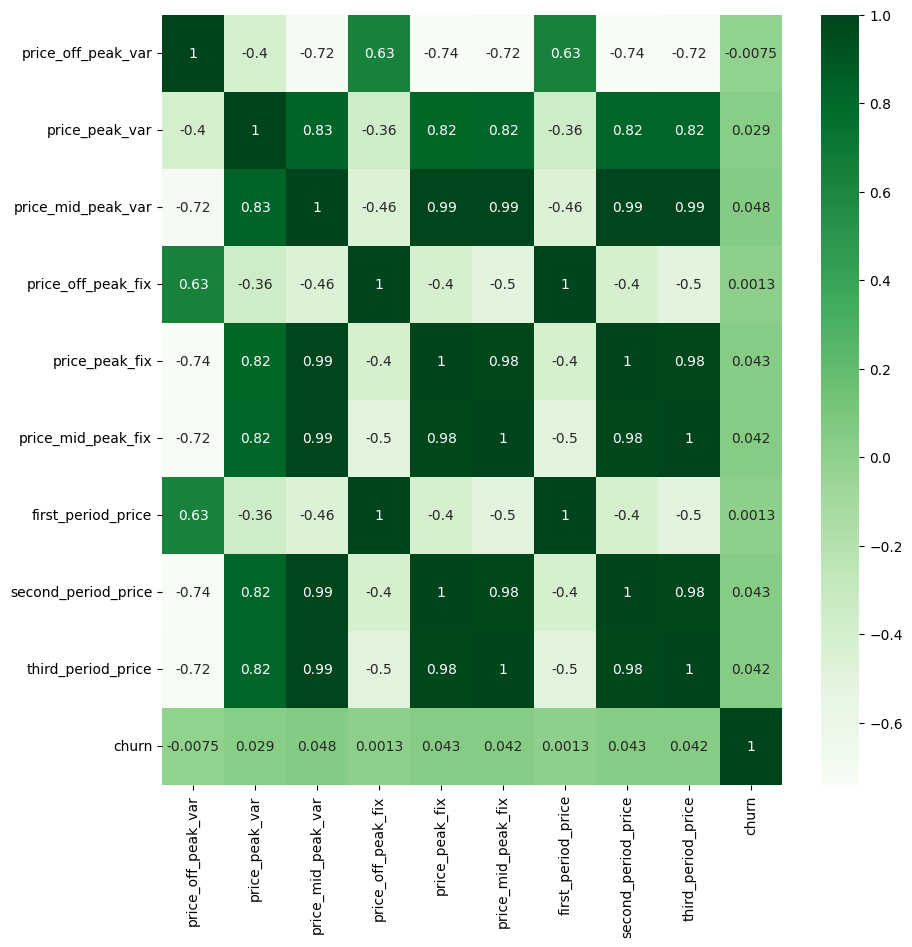

In [34]:
plt.figure(figsize=(10,10))
corr = price_features_.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot = True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

This heatmap also shows that Prices throughout the year for customer who subscribed for the Gas also doesnt correlate with the Churning of customers. This means that for all the customers, price is not the factor for their churning.

<h3> Conclusion </h3>

Though, Price is inelastic in nature for gas and electricity in general. In this case, Since price is not the reason for the churning, we can say that the company needs to look at other factors and collect some more data to get insights of their churning customers.